<a href="https://colab.research.google.com/github/akshat7776/Frames-to-Fables/blob/main/Assignment%202/240085_Akshat_Kasarwal_ass_02_code_decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
import pandas as pd

In [18]:
df = pd.read_csv('/content/AER_credit_card_data.csv')

In [19]:
df.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


In [20]:
df['card'] = df['card'].replace({'yes': 1, 'no': 0})
df['card'].value_counts()

<ipython-input-20-395870734751>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['card'] = df['card'].replace({'yes': 1, 'no': 0})


,count
card,
1,1023
0,296


In [21]:
df.describe()

,card,reports,age,income,share,expenditure,dependents,months,majorcards,active
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,0.775588,0.456406,33.213103,3.365376,0.068732,185.057071,0.993935,55.267627,0.817286,6.996967
std,0.417353,1.345267,10.142783,1.693902,0.094656,272.218917,1.247745,66.271746,0.386579,6.305812
min,0.000000,0.000000,0.166667,0.210000,0.000109,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,25.416670,2.243750,0.002316,4.583333,0.000000,12.000000,1.000000,2.000000
50%,1.000000,0.000000,31.250000,2.900000,0.038827,101.298300,1.000000,30.000000,1.000000,6.000000
75%,1.000000,0.000000,39.416670,4.000000,0.093617,249.035800,2.000000,72.000000,1.000000,11.000000
max,1.000000,14.000000,83.500000,13.500000,0.906320,3099.505000,6.000000,540.000000,1.000000,46.000000


In [22]:
x = [col for col in df.columns if col not in ['owner' , 'selfemp']]
y = df['card']

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [24]:
le=LabelEncoder()
yencoding = le.fit_transform(y)
xtrain,xtest,ytrain,ytest = train_test_split(df[x],yencoding,test_size=0.2,random_state=42)
Scalar = StandardScaler()
xtrain_scaled = Scalar.fit_transform(xtrain)
xtest_scaled = Scalar.fit_transform(xtest)

In [25]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)

# Train the model
rf_model.fit(xtrain_scaled, ytrain)

# predictions
y_pred = rf_model.predict(xtest_scaled)

# Evalualation
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

accuracy = accuracy_score(ytest, y_pred)
print(f"Accuracy: {accuracy}")

print(classification_report(ytest, y_pred))


Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        62
           1       1.00      1.00      1.00       202

    accuracy                           1.00       264
   macro avg       1.00      1.00      1.00       264
weighted avg       1.00      1.00      1.00       264



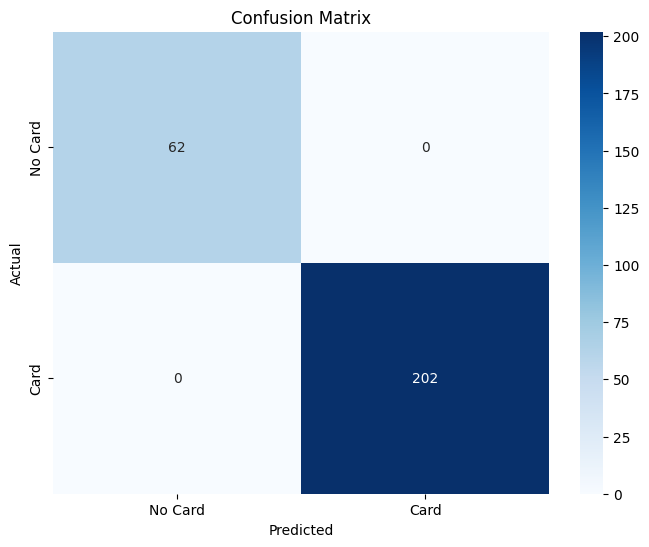

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(ytest, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Card', 'Card'], yticklabels=['No Card', 'Card'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()